### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])
processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
# processed_data['night'] = processed_data['hour'].apply(lambda hour: (hour >= 0) & (hour <= 4))
# processed_data['early_morning'] = processed_data['hour'].apply(lambda hour: (hour >= 5) & (hour <= 6))
# processed_data['morning'] = processed_data['hour'].apply(lambda hour: (hour >= 7) & (hour <= 9))
# processed_data['working_hours'] = processed_data['hour'].apply(lambda hour: (hour >= 10) & (hour <= 18))
# processed_data['evening'] = processed_data['hour'].apply(lambda hour: (hour >= 19) & (hour <= 23))
# col_hours = ['night', 'early_morning', 'morning', 'working_hours', 'evening']

In [8]:
# processed_data['time_of_day'] = processed_data['hour'].apply(lambda h: '0-3' if (h >= 0) & (h <= 3) 
#                   else '4-6' if (h >= 4) & (h <= 6) 
#                         else '7-9' if (h >= 7) & (h <= 9) 
#                                 else '10-18' if (h >= 10) & (h <= 18) 
#                                         else '19-23' if (h >= 19) & (h <= 23) else 5)

In [9]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

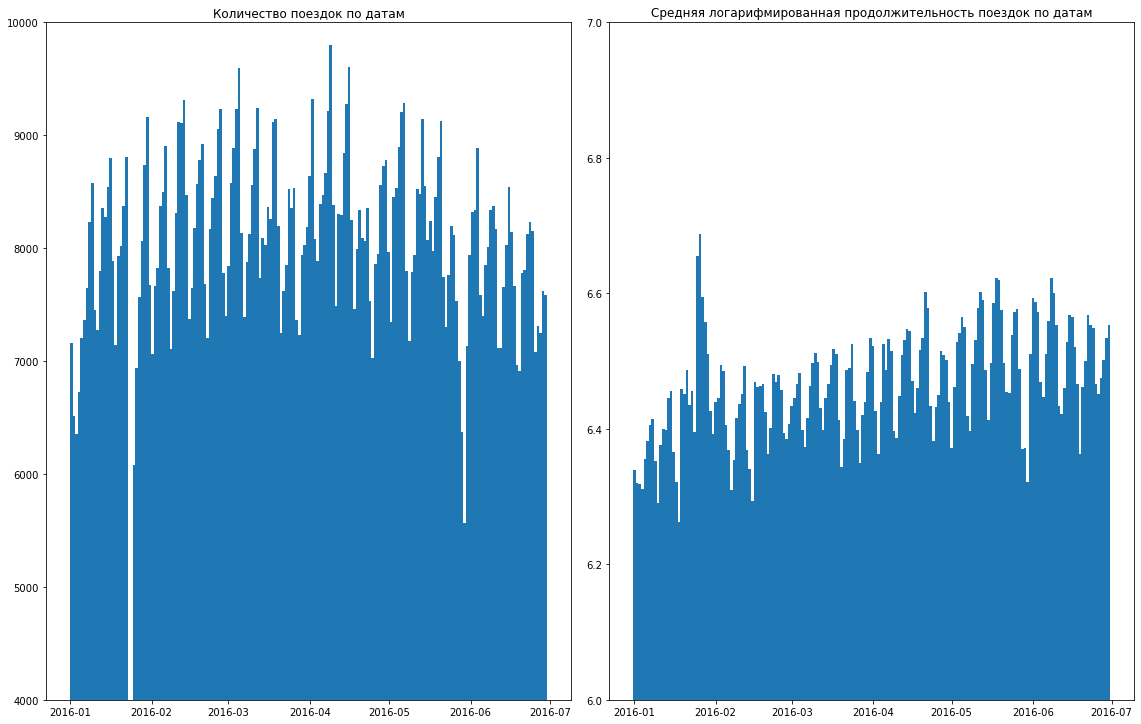

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

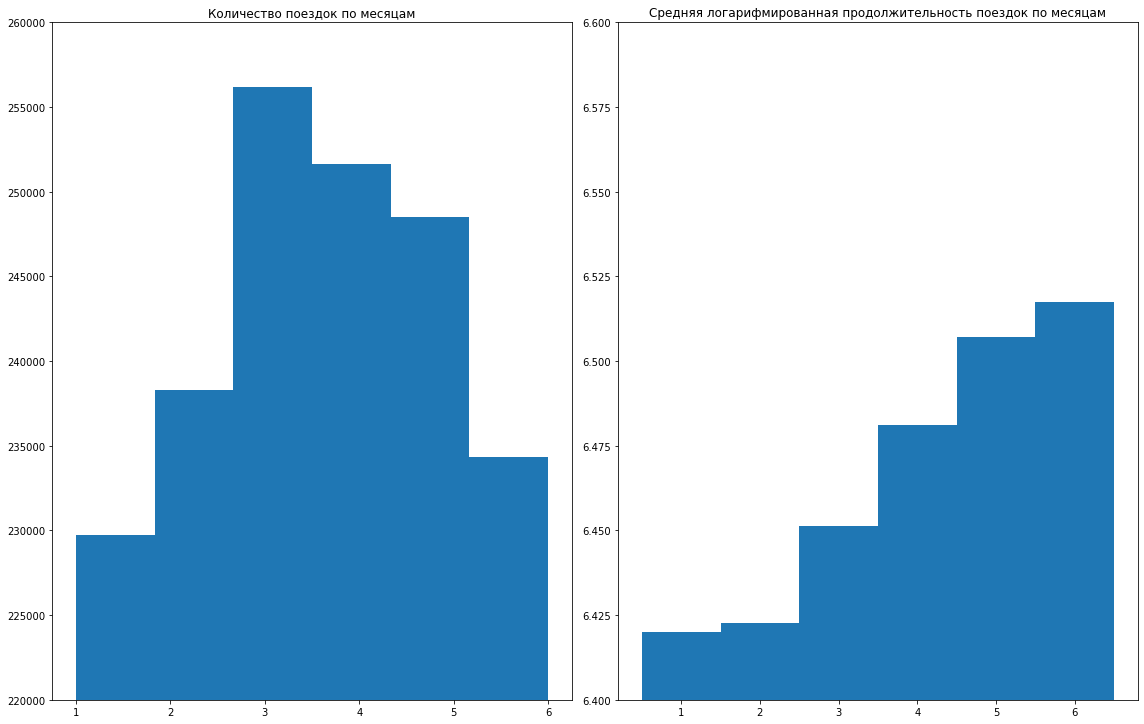

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins=processed_data.month.unique().shape[0])
plt.ylim((220000, 260000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['month'].unique())), 
        processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6.4, 6.6))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по месяцам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


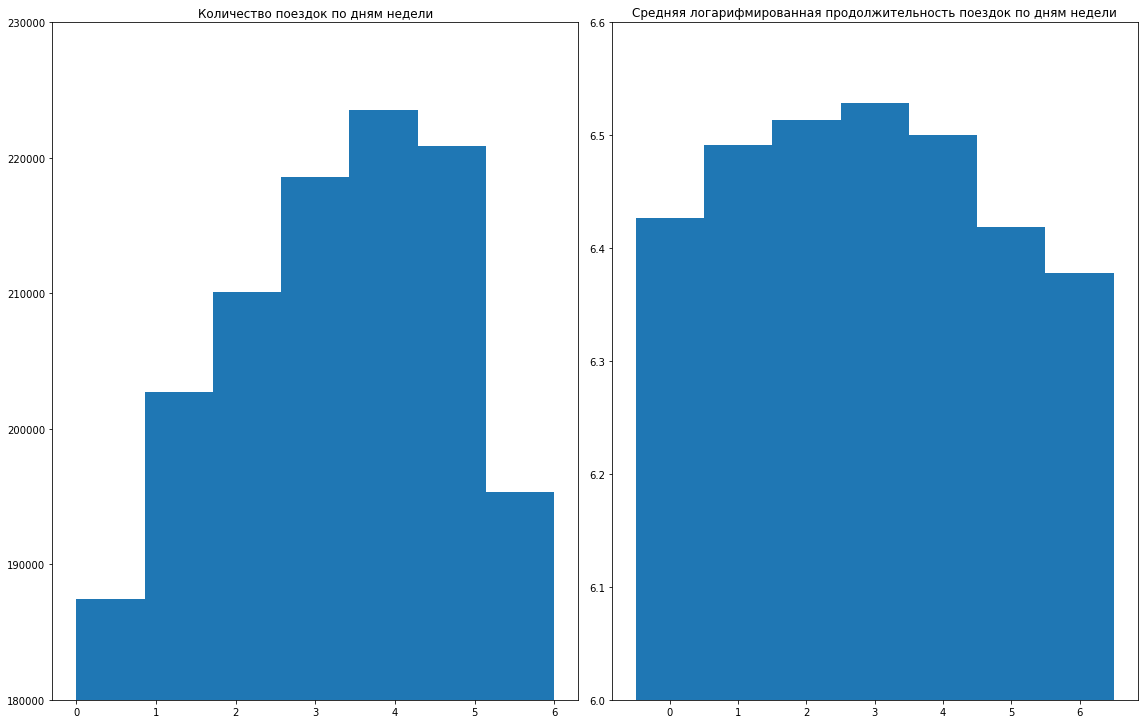

In [12]:
### Your code is here
import matplotlib.pyplot as plt


fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data['day_of_week'].unique().shape[0])
plt.ylim((180000, 230000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby(processed_data['day_of_week'], as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 6.6))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()



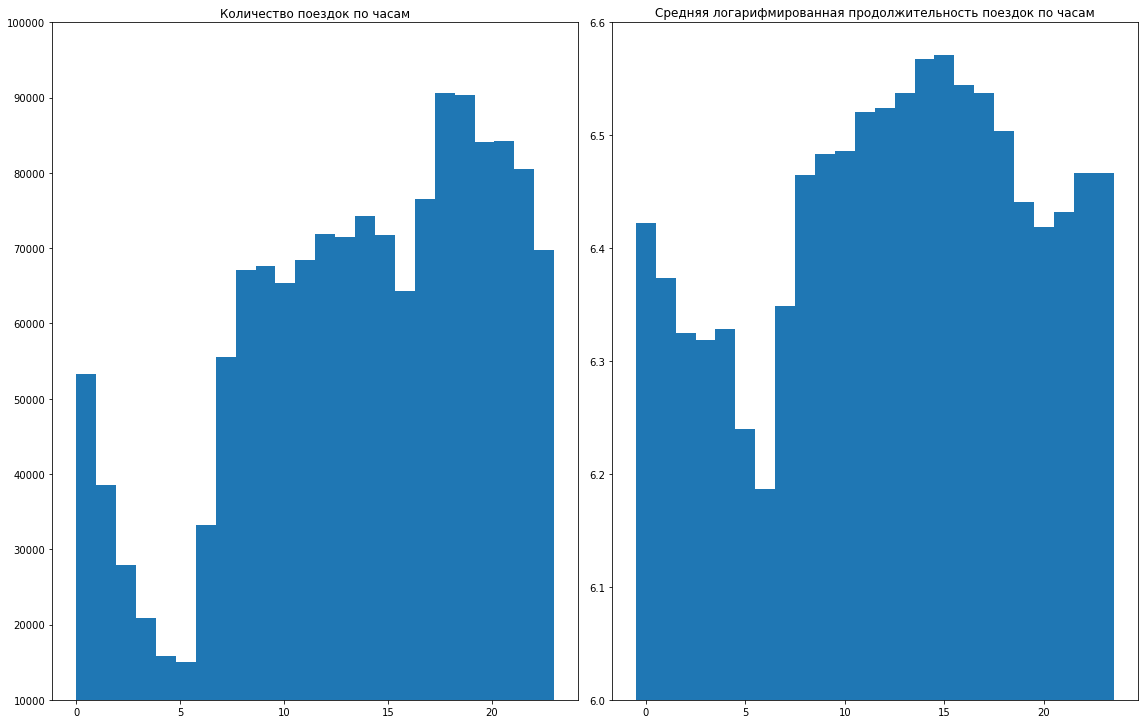

In [13]:
### Your code is here
import matplotlib.pyplot as plt


fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data['hour'].unique().shape[0])
plt.ylim((10000, 100000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby(processed_data['hour'], as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 6.6))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по часам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по часам')

plt.show()



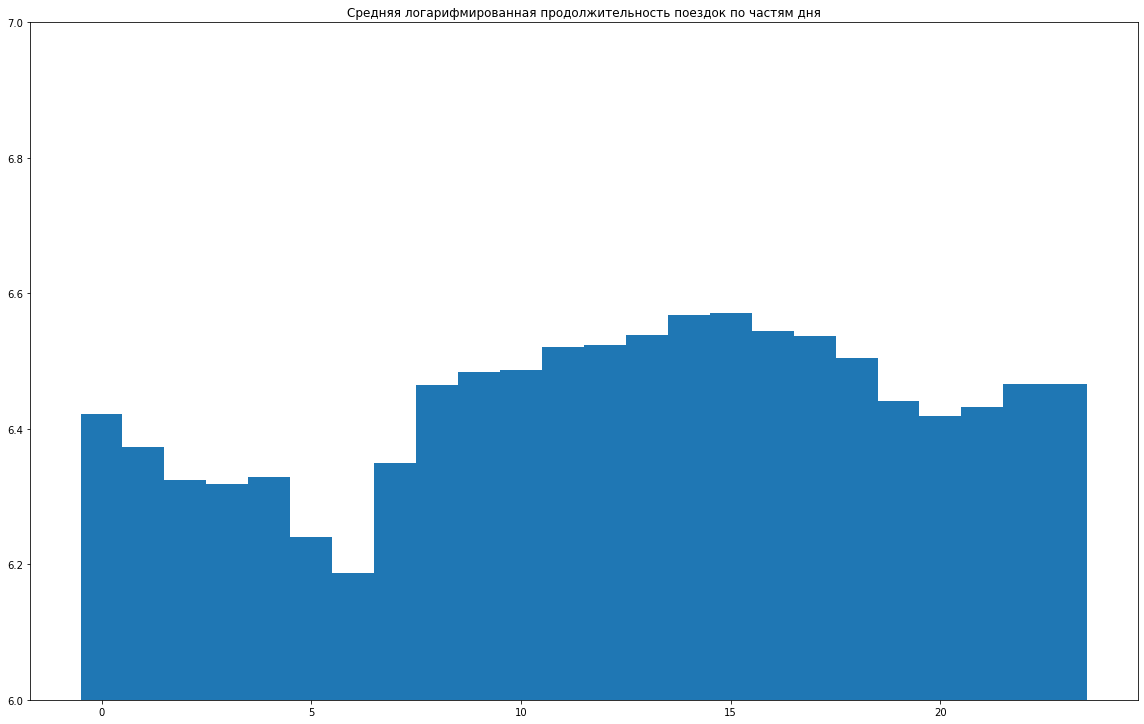

In [14]:
### Your code is here
import matplotlib.pyplot as plt


fig = plt.figure()

fig.set_size_inches(16, 10)

# ax_1 = fig.add_subplot(1, 2, 1)
# plt.hist(processed_data['col_hours'], bins=processed_data['col_hours'].unique().shape[0])
# plt.ylim((100000, 700000))

# ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby(processed_data['hour'], as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()
plt.title('Средняя логарифмированная продолжительность поездок по частям дня')
# ax_1.set(title = 'Количество поездок по частям дня')
# fig.set(title = 'Средняя логарифмированная продолжительность поездок по частям дня')

plt.show()



In [15]:
data_by_time= processed_data.groupby(['day_of_week','hour'], as_index=False)['log_trip_duration'].count()

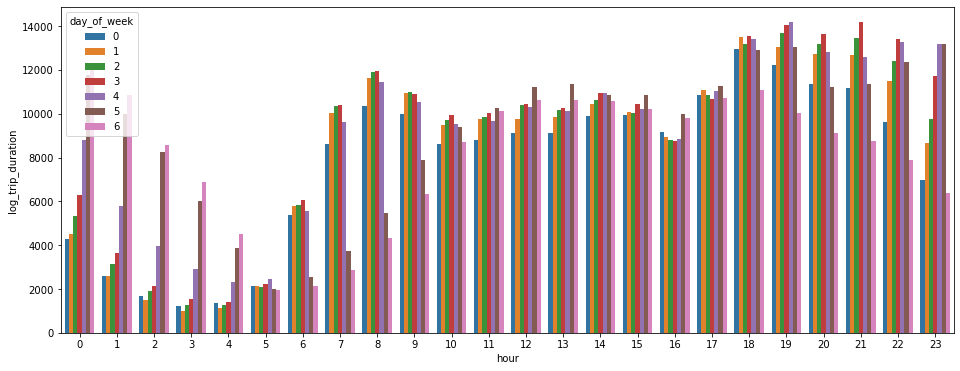

In [16]:
import seaborn as sns
plt.figure(figsize=(16, 6)) 
sns.barplot(x="hour", y="log_trip_duration", hue="day_of_week", data=data_by_time);


In [17]:
df = processed_data.groupby('hour', as_index=False).agg({'log_trip_duration': 'mean', 'pickup_datetime': 'count'})#.rename({'pickup_datetime': 'count_trip'})
df.corr()

,hour,log_trip_duration,pickup_datetime
hour,1.000000,0.558777,0.813308
log_trip_duration,0.558777,1.000000,0.765060
pickup_datetime,0.813308,0.765060,1.000000


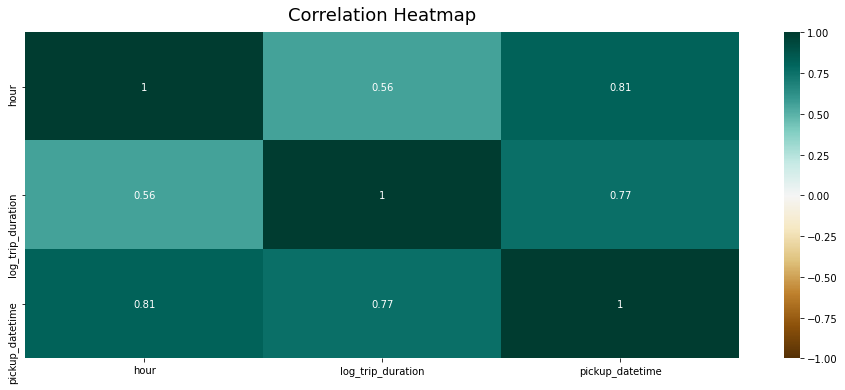

In [18]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

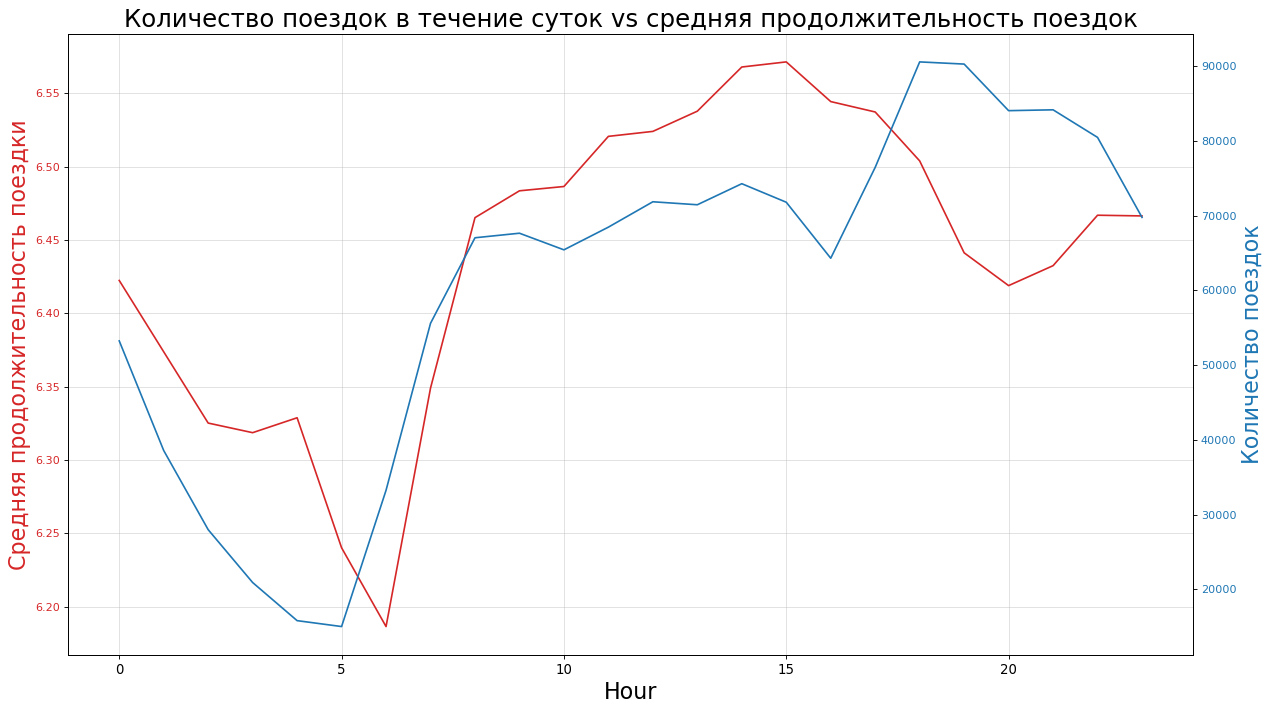

In [19]:
x = df['hour']
y1 = df['log_trip_duration']
y2 = df['pickup_datetime']

fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Hour', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Средняя продолжительность поездки', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Количество поездок", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
#ax2.set_xticks(np.arange(0, len(x), 60))
#ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Количество поездок в течение суток vs средняя продолжительность поездок", fontsize=22)
fig.tight_layout()
plt.show()

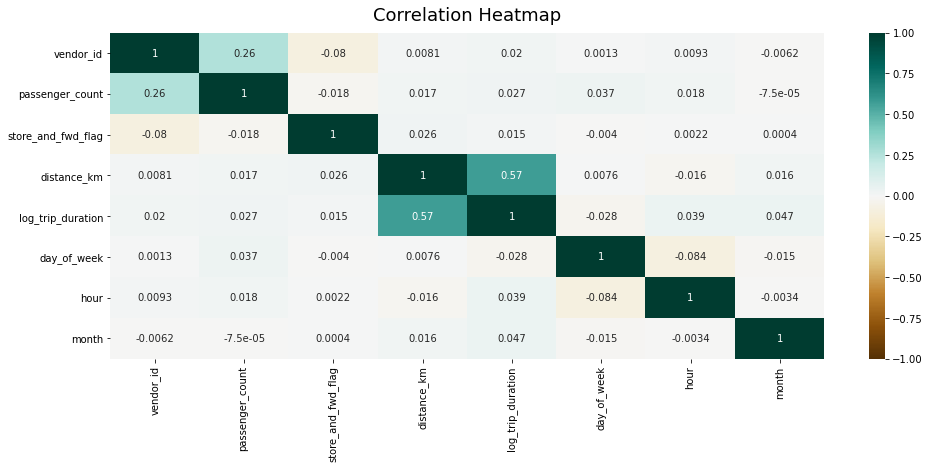

In [20]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(processed_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

# Сохраните карту как png файл 
# Параметр dpi устанавливает разрешение сохраняемого изображения в точках на дюйм 
# bbox_inches, когда установлен в значение 'tight', не позволяет обрезать лейблы

#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [21]:
### Создадим первый бинарный признак
### Your code is here
processed_data['anomaly'] =  (processed_data['date'] == pd.to_datetime('2016-01-23')).astype(int)

/Users/olgamorozova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [22]:
processed_data['anomaly'].unique()


array([0, 1])

In [23]:
### Создадим второй бинарный признак
### Your code is here
top10= processed_data.groupby(['day_of_week','hour'], as_index=False)['log_trip_duration'].mean()\
              .sort_values('log_trip_duration', ascending=False).head(10)
top_dur = list(zip(top10['day_of_week'],top10['hour']))

In [24]:
processed_data['traffic_jam'] = list(zip(processed_data['day_of_week'], processed_data['hour']))
processed_data['traffic_jam'] = processed_data['traffic_jam'].isin(top_dur).astype(int)

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [25]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [26]:
### Делаем OneHotEncoding и конкатим с processed_data
for col in ['day_of_week', 'hour', 'month']:
    processed_data = pd.concat((processed_data, pd.get_dummies(processed_data[col], prefix = col, drop_first=True)), axis=1)
    processed_data = processed_data.drop([col], axis=1)
    ### Your code is here , prefix = col[0]

In [27]:
processed_data.columns

Index(['vendor_id', 'passenger_count', 'store_and_fwd_flag', 'distance_km',
       'log_trip_duration', 'anomaly', 'traffic_jam', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [28]:
# processed_data = processed_data.drop(col + '0', axis=1)

In [29]:
processed_data.shape

(1458644, 41)

In [30]:
processed_data.head(5).to_csv('37_4.csv')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [31]:
# ### Your code is here
processed_data[['distance_km', 'passenger_count']].corr()
# plt.figure(figsize=(16, 6))
# heatmap = sns.heatmap(processed_data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 


,distance_km,passenger_count
distance_km,1.000000,0.016596
passenger_count,0.016596,1.000000


In [32]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

### Your code is here
x = processed_data.drop('log_trip_duration', axis=1)
y = processed_data['log_trip_duration']

model = LinearRegression()

sfs = SequentialFeatureSelector(model, n_features_to_select=5)
sfs.fit(x, y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [33]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
features_names = []
for name, res in zip(x.columns, sfs.get_support()):
    if res == True:
        features_names.append(name)

In [34]:
sfs.get_feature_names_out()

AttributeError: 'SequentialFeatureSelector' object has no attribute 'get_feature_names_out'

In [696]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
X_5 = x[features_names]

model = LinearRegression()
model.fit(X_5, y)

#print('MSE train равен: ', np.round((np.mean((y_test-model.predict(X_test))**2)),3))
print('MSE test равен: ', np.round((np.mean((y-model.predict(X_5))**2)),3))

MSE test равен:  0.415


In [41]:
import sklearn
print(sklearn.__version__)

0.24.1
